In [1]:
import os
import pandas as pd

/home/sneha/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


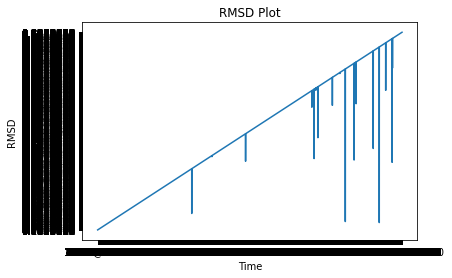

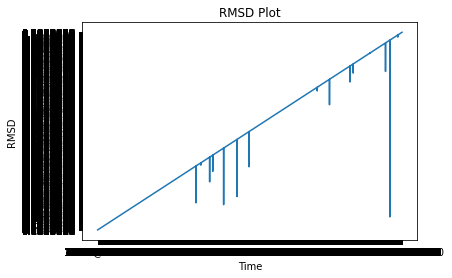

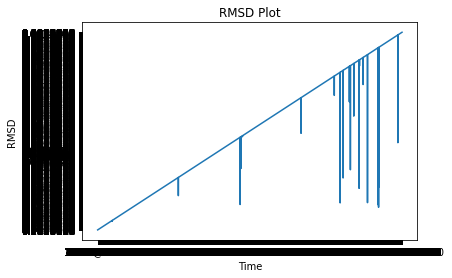

KeyboardInterrupt: 

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_rmsd_file(folder_path):
    # Get the path of the 'rmsd.xvg' file in the folder
    file_path = os.path.join(folder_path, 'rmsd.xvg')

    # Read the file, skipping the first 17 rows
    df = pd.read_csv(file_path, skiprows=17, delimiter='\s+', header=None)

    # Assuming the data columns are in the first two columns (adjust if needed)
    x = df.iloc[:, 0].to_numpy()
    y = df.iloc[:, 1].to_numpy()

    # Create the plot
    plt.plot(x, y)
    plt.xlabel('Time')
    plt.ylabel('RMSD')
    plt.title('RMSD Plot')

    # Display the plot
    plt.show()

def process_all_folders(root_folder):
    # Get all subdirectories within the root folder
    subfolders = [f.path for f in os.scandir(root_folder) if f.is_dir()]

    # Process each folder
    for folder in subfolders:
        if not folder.endswith('.ipynb_checkpoints'):  # Exclude .ipynb_checkpoints folders
            process_rmsd_file(folder)
        
# Specify the root folder containing all the subfolders
root_folder = '/home/sneha/work/Final_models/26_12_2022/all/'

# Process all folders and plot the data
process_all_folders(root_folder)


In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt

def process_all_folders(root_folder):
    # Get all subdirectories within the root folder
    subfolders = [f.path for f in os.scandir(root_folder) if f.is_dir()]

    # Initialize lists to store data from each folder
    time_list = []
    rmsd_list = []

    # Process each folder
    for folder in subfolders:
        if not folder.endswith('.ipynb_checkpoints'):  # Exclude .ipynb_checkpoints folders
            #process_rmsd_file(folder)
            # Get the path of the 'rmsd.xvg' file in the folder
            file_path = os.path.join(folder, 'rmsd.xvg')

            # Read the RMSD file, skipping the first 24 rows
            data = np.genfromtxt(file_path, skip_header=24)

            # Extract time and RMSD values
            time = data[:, 0]
            rmsd = data[:, 1]

            # Append the data to the respective lists
            time_list.append(time)
            rmsd_list.append(rmsd)
    # Check if any folders were processed
    if len(subfolders) == 0:
        print("No subfolders found.")
        return
    #print(file_path)
    # Plot the RMSD values from all folders
    for i in range(len(subfolders)):
        print(subfolders[i])
        
        plt.plot(time_list[i]*0.001, rmsd_list[i]*10, label=f'Folder {i+1}')

        # Set plot labels and title
        plt.xlabel('Time (ns)')
        plt.ylabel('RMSD (Å)')
        plt.title('RMSD Plot')

        # Add legend and save the plot
        plt.legend()
        #plt.savefig('RMSD.png', dpi=1600)

        # Show the plot
        plt.show()

File path: /home/sneha/work/Final_models/26_12_2022/all/senx3_regx3/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/mtr_ab/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/senx_mtra/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/tcrXY/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/narsl/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/tcrx_mtrb/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/mtrb_regx/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/tcry_mtrA/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/mtrb_narl/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/mtrb_pdta/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/mtra_nars/rmsd.xvg


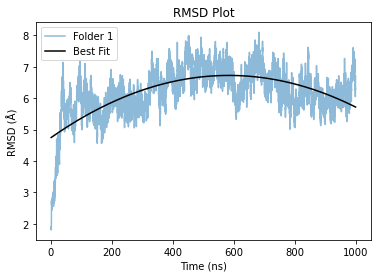

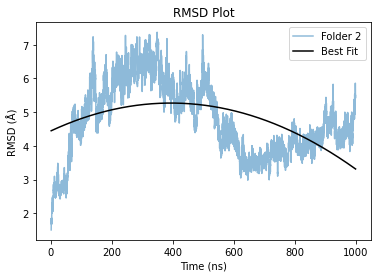

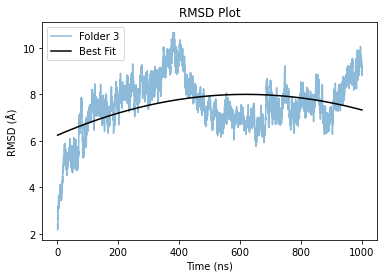

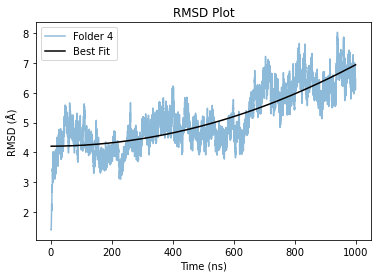

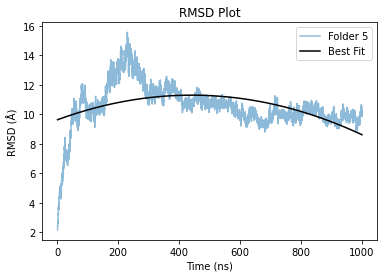

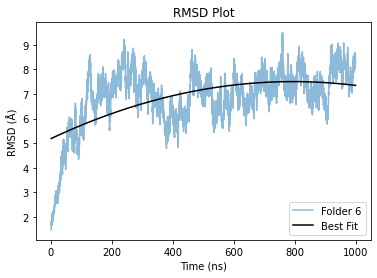

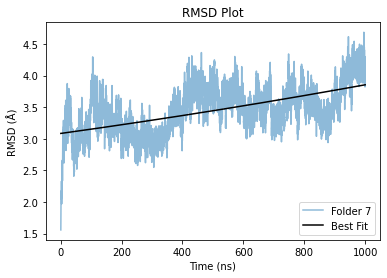

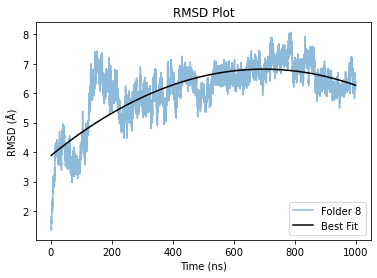

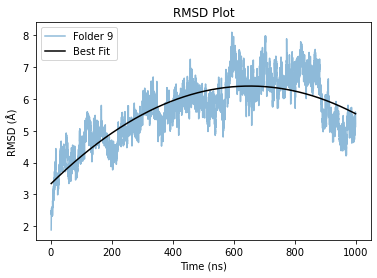

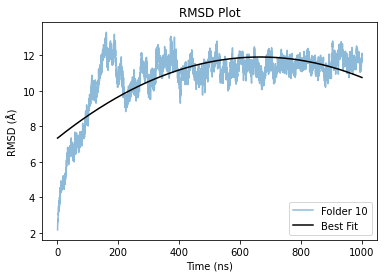

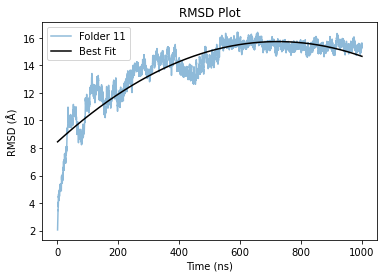

IndexError: list index out of range

In [45]:
process_all_folders(root_folder)

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt

def process_all_folders(root_folder):
    # Get all subdirectories within the root folder
    subfolders = [f.path for f in os.scandir(root_folder) if f.is_dir()]

    # Initialize lists to store data from each folder
    time_list = []
    rmsd_list = []

    # Process each folder
    for folder in subfolders:
        if not folder.endswith('.ipynb_checkpoints'):  # Exclude .ipynb_checkpoints folders
            # Get the path of the 'rmsd.xvg' file in the folder
            file_path = os.path.join(folder, 'rmsd.xvg')

            # Read the RMSD file, skipping the first 24 rows
            data = np.genfromtxt(file_path, skip_header=24)

            # Extract time and RMSD values
            time = data[:, 0]
            rmsd = data[:, 1]

            # Append the data to the respective lists
            time_list.append(time)
            rmsd_list.append(rmsd)
            print(f"Processed folder: {folder}")

    # Check if any folders were processed
    if len(time_list) == 0 or len(rmsd_list) == 0:
        print("No valid subfolders found.")
        return

    # Plot the RMSD values from all folders
    for i in range(len(subfolders)):
        plt.plot(time_list[i] * 0.01, rmsd_list[i], label=f'Folder {i + 1}')

    # Set plot labels and title
    plt.xlabel('Time (ns)')
    plt.ylabel('RMSD (nm)')
    plt.title('RMSD Plot')

    # Add legend and save the plot
    plt.legend()
    plt.savefig('RMSD.png', dpi=1600)

    # Show the plot
    plt.show()

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def process_all_folders(root_folder):
    # Get all subdirectories within the root folder
    subfolders = [f.path for f in os.scandir(root_folder) if f.is_dir()]

    # Initialize lists to store data from each folder
    time_list = []
    rmsd_list = []

    # Process each folder
    for folder in subfolders:
        if not folder.endswith('.ipynb_checkpoints'):  # Exclude .ipynb_checkpoints folders
            # Get the path of the 'rmsd.xvg' file in the folder
            file_path = os.path.join(folder, 'rmsd.xvg')
            print(f"File path: {file_path}")  # Print the file path

            # Read the RMSD file, skipping the first 24 rows
            data = np.genfromtxt(file_path, skip_header=24)

            # Extract time and RMSD values
            time = data[:, 0]
            rmsd = data[:, 1] * 10  # Convert nm to Å

            # Append the data to the respective lists
            time_list.append(time)
            rmsd_list.append(rmsd)

    # Check if any folders were processed
    if len(time_list) == 0 or len(rmsd_list) == 0:
        print("No valid subfolders found.")
        return

    # Plot the RMSD values from all folders with transparency
    for i in range(len(subfolders)):
        plt.plot(time_list[i] * 0.01, rmsd_list[i], label=f'Folder {i + 1}', alpha=0.5)

        # Fit a polynomial of degree 2 to the RMSD data
        poly_coeffs = np.polyfit(time_list[i] * 0.01, rmsd_list[i], deg=2)
        best_fit = np.polyval(poly_coeffs, time_list[i] * 0.01)

        # Plot the best fit line
        plt.plot(time_list[i] * 0.01, best_fit, label='Best Fit', color='black')

        # Set plot labels and title
        plt.xlabel('Time (ns)')
        plt.ylabel('RMSD (Å)')
        plt.title('RMSD Plot')

        # Add legend and save the plot
        plt.legend()
        #plt.savefig('RMSD.png', dpi=1600)

        # Show the plot
        plt.show()

File path: /home/sneha/work/Final_models/26_12_2022/all/senx3_regx3/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/mtr_ab/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/senx_mtra/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/tcrXY/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/narsl/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/tcrx_mtrb/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/mtrb_regx/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/tcry_mtrA/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/mtrb_narl/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/mtrb_pdta/rmsd.xvg
File path: /home/sneha/work/Final_models/26_12_2022/all/mtra_nars/rmsd.xvg
/home/sneha/work/Final_models/26_12_2022/all/senx3_regx3


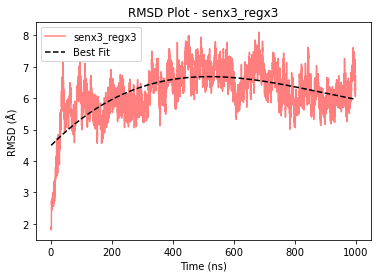

/home/sneha/work/Final_models/26_12_2022/all/mtr_ab


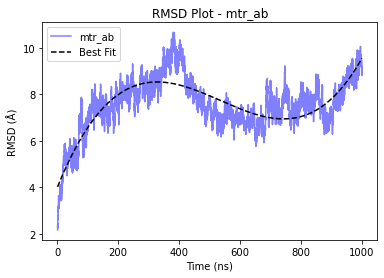

/home/sneha/work/Final_models/26_12_2022/all/senx_mtra


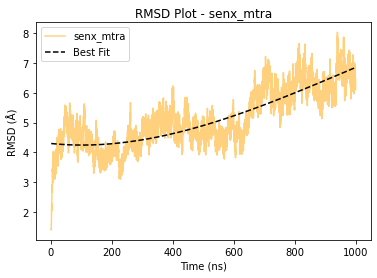

/home/sneha/work/Final_models/26_12_2022/all/tcrXY


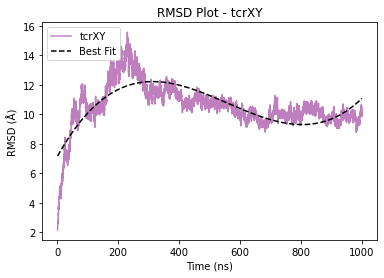

/home/sneha/work/Final_models/26_12_2022/all/narsl


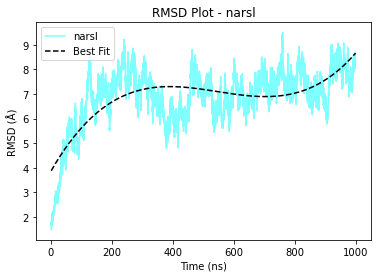

/home/sneha/work/Final_models/26_12_2022/all/tcrx_mtrb


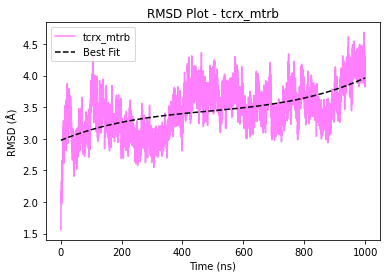

/home/sneha/work/Final_models/26_12_2022/all/mtrb_regx


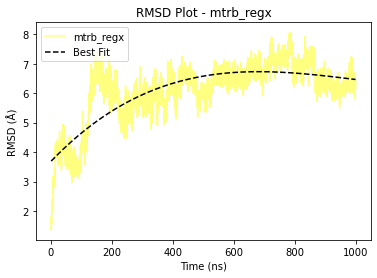

/home/sneha/work/Final_models/26_12_2022/all/tcry_mtrA


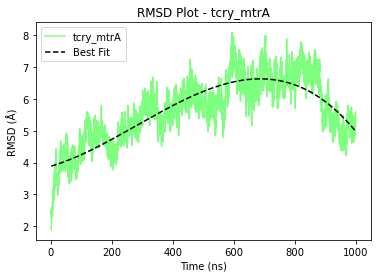

/home/sneha/work/Final_models/26_12_2022/all/mtrb_narl


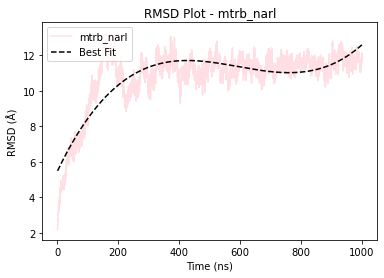

/home/sneha/work/Final_models/26_12_2022/all/mtrb_pdta


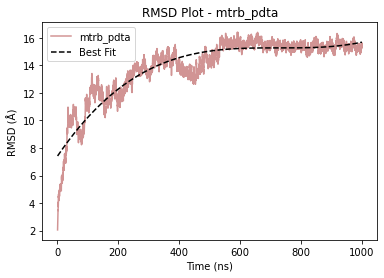

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'lime', 'pink', 'brown']

def process_all_folders(root_folder):
    # Get all subdirectories within the root folder
    subfolders = [f.path for f in os.scandir(root_folder) if f.is_dir()]

    # Initialize lists to store data from each folder
    time_list = []
    rmsd_list = []

    # Process each folder
    for folder in subfolders:
        if not folder.endswith('.ipynb_checkpoints'):  # Exclude .ipynb_checkpoints folders
            # Get the path of the 'rmsd.xvg' file in the folder
            file_path = os.path.join(folder, 'rmsd.xvg')
            print(f"File path: {file_path}")  # Print the file path

            # Read the RMSD file, skipping the first 24 rows
            data = np.genfromtxt(file_path, skip_header=24)

            # Extract time and RMSD values
            time = data[:, 0]
            rmsd = data[:, 1] * 10  # Convert nm to Å

            # Append the data to the respective lists
            time_list.append(time)
            rmsd_list.append(rmsd)

    # Plot the RMSD values from all folders with transparency
    for i in range(0,len(subfolders)-1):
        #print(subfolders)
        if not subfolders[i].endswith('.ipynb_checkpoints'):
            print(subfolders[i])
            plt.figure()  # Create a new figure for each folder's plot
            plt.plot(time_list[i] * 0.01, rmsd_list[i], label=os.path.basename(subfolders[i]), alpha=0.5, color=colors[i])

            # Fit a polynomial of degree 3 to the RMSD data
            poly_coeffs = np.polyfit(time_list[i] * 0.01, rmsd_list[i], deg=3)
            best_fit = np.polyval(poly_coeffs, time_list[i] * 0.01)

            # Plot the best fit line with a dashed line style
            plt.plot(time_list[i] * 0.01, best_fit, label='Best Fit', color='black', linestyle='dashed')

            # Set plot labels and title
            plt.xlabel('Time (ns)')
            plt.ylabel('RMSD (Å)')
            plt.title('RMSD Plot - ' + os.path.basename(subfolders[i]))

            # Add legend and save the plot
            plt.legend(loc='upper left')

            # Show the plot
            plt.show()
process_all_folders(root_folder)

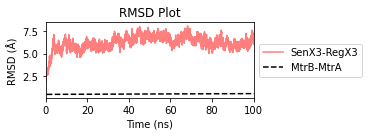

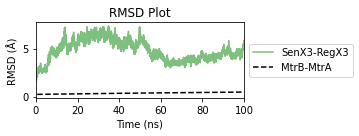

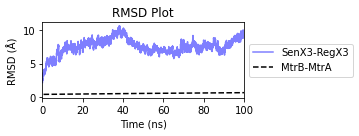

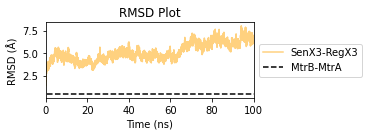

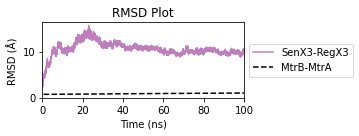

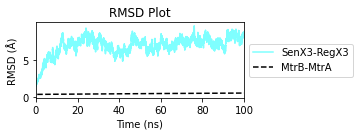

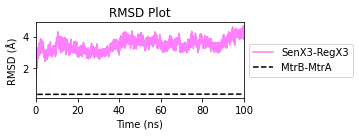

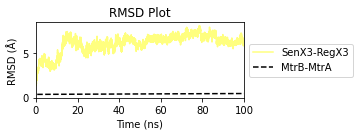

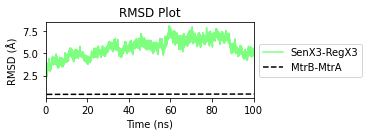

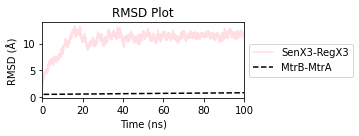

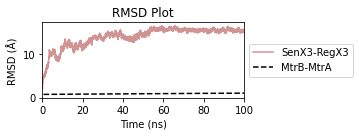

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'lime', 'pink', 'brown']
labels = ['SenX3-RegX3','MtrB-MtrA','SenX3-MtrA','TcrX-TcrY','NarS-NarL','TcrX-MtrB','MtrB-RegX3','TcrY-MtrA',
         'MtrB-NarL','MtrB-PdtaR','MtrA-NarS']

# Define file paths
file_paths = ['/home/sneha/work/Final_models/26_12_2022/all/senx3_regx3/rmsd.xvg',
'/home/sneha/work/Final_models/26_12_2022/all/mtr_ab/rmsd.xvg',
'/home/sneha/work/Final_models/26_12_2022/all/senx_mtra/rmsd.xvg',
'/home/sneha/work/Final_models/26_12_2022/all/tcrXY/rmsd.xvg',
'/home/sneha/work/Final_models/26_12_2022/all/narsl/rmsd.xvg',
'/home/sneha/work/Final_models/26_12_2022/all/tcrx_mtrb/rmsd.xvg',
'/home/sneha/work/Final_models/26_12_2022/all/mtrb_regx/rmsd.xvg',
'/home/sneha/work/Final_models/26_12_2022/all/tcry_mtrA/rmsd.xvg',
'/home/sneha/work/Final_models/26_12_2022/all/mtrb_narl/rmsd.xvg',
'/home/sneha/work/Final_models/26_12_2022/all/mtrb_pdta/rmsd.xvg',
'/home/sneha/work/Final_models/26_12_2022/all/mtra_nars/rmsd.xvg'
]







# Read and plot the data
for i, file_path in enumerate(file_paths):
    # Read the data
    data = np.genfromtxt(file_path, skip_header=24)
    time = data[:, 0]
    rmsd = data[:, 1]

    # Plot the data
    plt.plot(time * 0.001, rmsd * 10, label=labels[i], color=colors[i],alpha=0.5)
    # Fit a polynomial of degree 3 to the RMSD data
    poly_coeffs = np.polyfit(time* 0.01, rmsd, deg=3)
    best_fit = np.polyval(poly_coeffs, time * 0.01)

    # Plot the best fit line with a dashed line style
    plt.plot(time * 0.01, best_fit, label='Best Fit', color='black', linestyle='dashed')

    # Set plot labels and title
    plt.xlabel('Time (ns)')
    plt.ylabel('RMSD (Å)')
    plt.title('RMSD Plot')
    plt.xlim(0,100)
    plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
    # Display the legend
    #plt.legend()
    plt.tight_layout(rect=[0,0.5, 0.85, 1])
    #plt.savefig('RMSD_all_1.png',dpi=1600)

    # Show the plot
    plt.show()

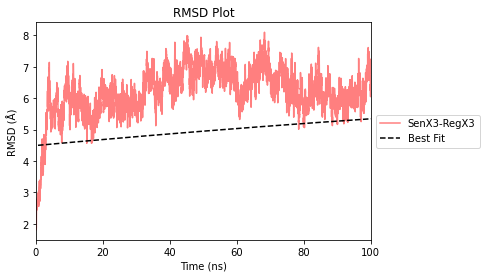

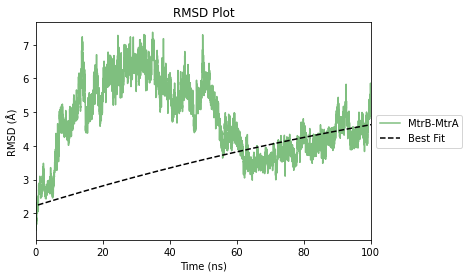

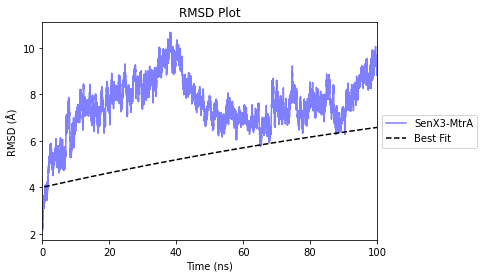

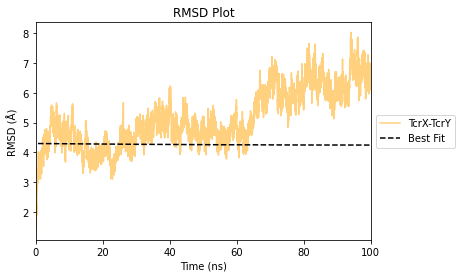

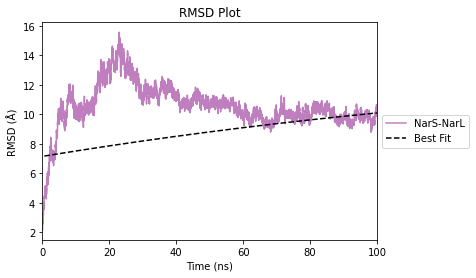

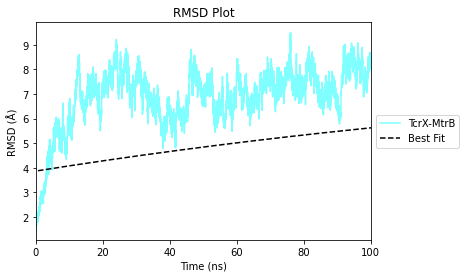

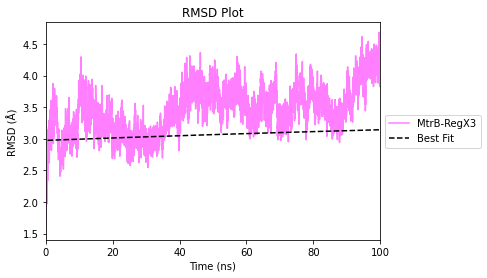

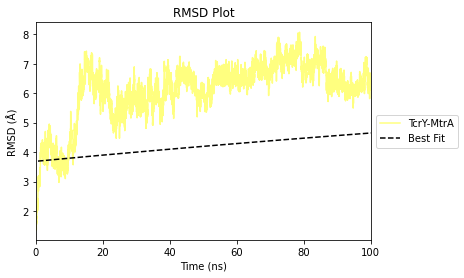

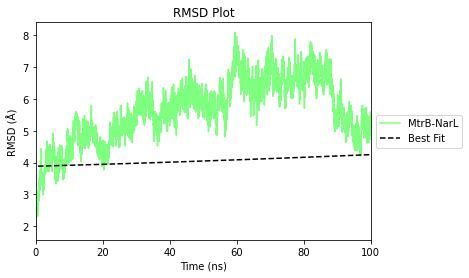

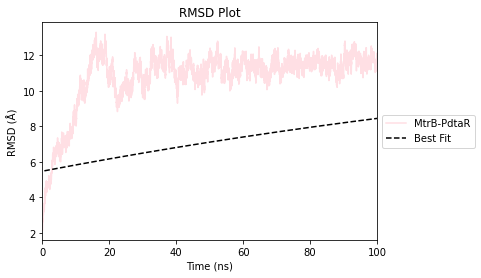

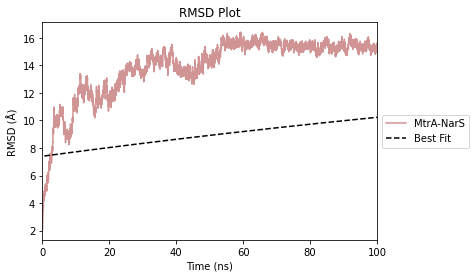

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'lime', 'pink', 'brown']
labels = ['SenX3-RegX3', 'MtrB-MtrA', 'SenX3-MtrA', 'TcrX-TcrY', 'NarS-NarL', 'TcrX-MtrB', 'MtrB-RegX3',
          'TcrY-MtrA', 'MtrB-NarL', 'MtrB-PdtaR', 'MtrA-NarS']

# Define file paths
file_paths = [
    '/home/sneha/work/Final_models/26_12_2022/all/senx3_regx3/rmsd.xvg',
    '/home/sneha/work/Final_models/26_12_2022/all/mtr_ab/rmsd.xvg',
    '/home/sneha/work/Final_models/26_12_2022/all/senx_mtra/rmsd.xvg',
    '/home/sneha/work/Final_models/26_12_2022/all/tcrXY/rmsd.xvg',
    '/home/sneha/work/Final_models/26_12_2022/all/narsl/rmsd.xvg',
    '/home/sneha/work/Final_models/26_12_2022/all/tcrx_mtrb/rmsd.xvg',
    '/home/sneha/work/Final_models/26_12_2022/all/mtrb_regx/rmsd.xvg',
    '/home/sneha/work/Final_models/26_12_2022/all/tcry_mtrA/rmsd.xvg',
    '/home/sneha/work/Final_models/26_12_2022/all/mtrb_narl/rmsd.xvg',
    '/home/sneha/work/Final_models/26_12_2022/all/mtrb_pdta/rmsd.xvg',
    '/home/sneha/work/Final_models/26_12_2022/all/mtra_nars/rmsd.xvg'
]



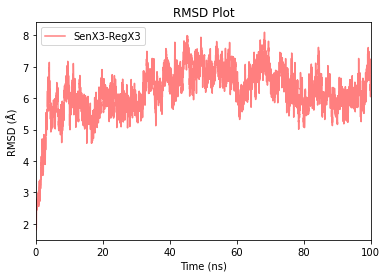

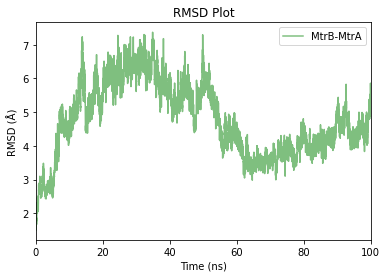

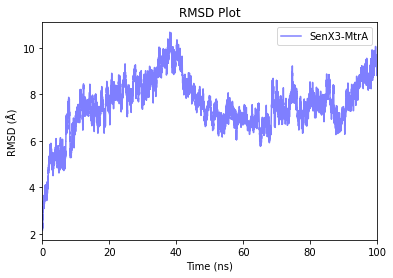

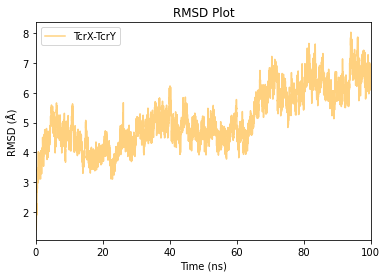

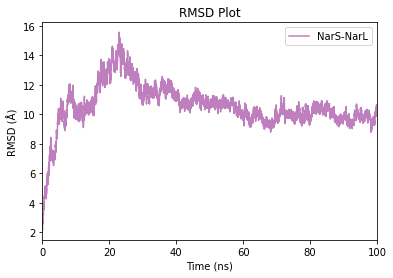

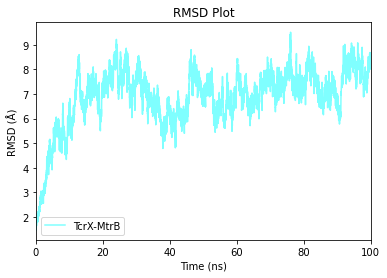

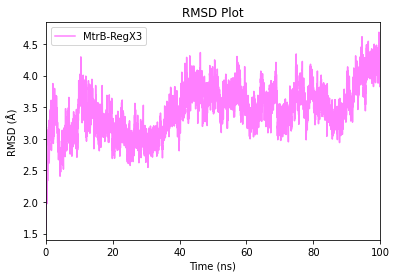

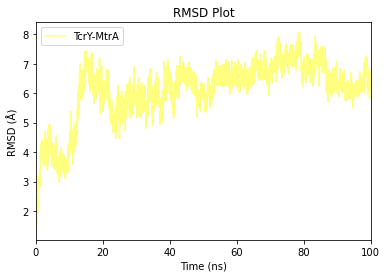

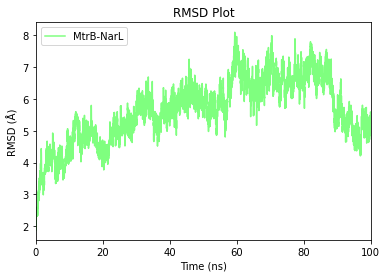

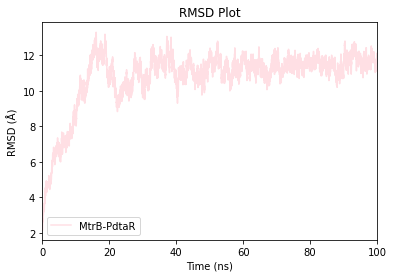

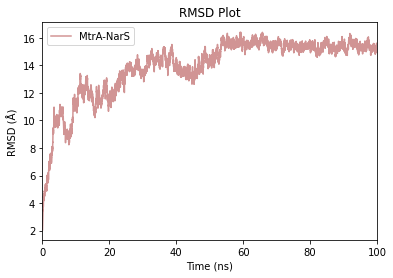

In [83]:
# Read and plot the data
for i, file_path in enumerate(file_paths):
    # Read the data
    data = np.genfromtxt(file_path, skip_header=24)
    time = data[:, 0]
    rmsd = data[:, 1] * 10  # Convert nm to Å

    # Create a new figure for each plot
    plt.figure()

    # Plot the RMSD data
    plt.plot(time * 0.001, rmsd, label=labels[i], color=colors[i], alpha=0.5)

    # Fit a polynomial of degree 3 to the RMSD data
    poly_coeffs = np.polyfit(time * 0.01, rmsd, deg=1)
    best_fit = np.polyval(poly_coeffs, time * 0.01)

    # Plot the best fit line with less smoothness
    #plt.plot(time * 0.01, best_fit, label='Best Fit', color='black', linestyle='-', linewidth=2)

    # Set plot labels and title
    plt.xlabel('Time (ns)')
    plt.ylabel('RMSD (Å)')
    plt.title('RMSD Plot')
    plt.xlim(0, 100)
    plt.legend()
    plt.savefig(f'RMSD_{i + 1}.png', dpi=600)
    # Show the plot
    plt.show()